# StarCleaner Example Workflow
This notebook demonstrates the workflow of loading a FITS image, detecting sources, querying Gaia, matching, masking, and plotting using the StarCleaner package.

In [1]:
import matplotlib.pyplot as plt
from starcleaner.io import load_image
from starcleaner.detect import detect_sources
from starcleaner.gaia import query_gaia
from starcleaner.match import match_sources
from starcleaner.masking import create_star_mask, apply_mask
from starcleaner.plotting import plot_sources, plot_matches, plot_all, plot_before_after_mask
from starcleaner.save_utils import save_masked_star_data, save_plot,save_skycoord_to_csv


## Load FITS Image

In [2]:
fits_path = "downloaded_decals/NGC6902_g.fits"
data, header, wcs = load_image(fits_path)
data.shape

(3000, 3000)

## Detect sources

In [3]:
sources = detect_sources(data,fwhm=3, sigma=3)
len(sources)

7765

## Convert sources to RA/Dec

In [4]:
sky = wcs.pixel_to_world(sources['xcentroid'], sources['ycentroid'])
ra = sky.ra.deg
dec = sky.dec.deg

## Query Gaia DR3

In [5]:
gaia = query_gaia(ra, dec,radius_arcmin=12)
len(gaia)

INFO: Query finished. [astroquery.utils.tap.core]


1542

## Match sources

In [6]:
matched_fuv, matched_gaia = match_sources(ra, dec, gaia,max_sep_arcsec=5)
len(matched_fuv)
matched_fuv

<SkyCoord (ICRS): (ra, dec) in deg
    [(306.12242083, -43.76249264), (306.02279439, -43.76247954),
     (305.97687778, -43.76244328), ..., (306.01503702, -43.5446132 ),
     (306.18425669, -43.54438852), (306.01497153, -43.54422331)]>

## Plot detections and matches

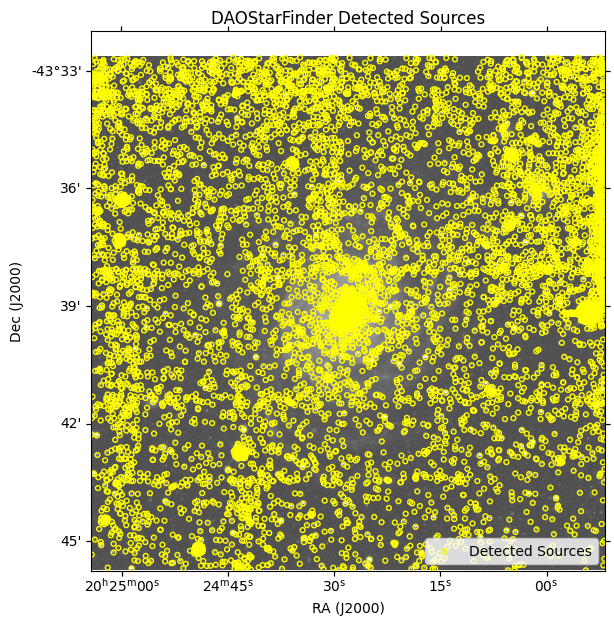

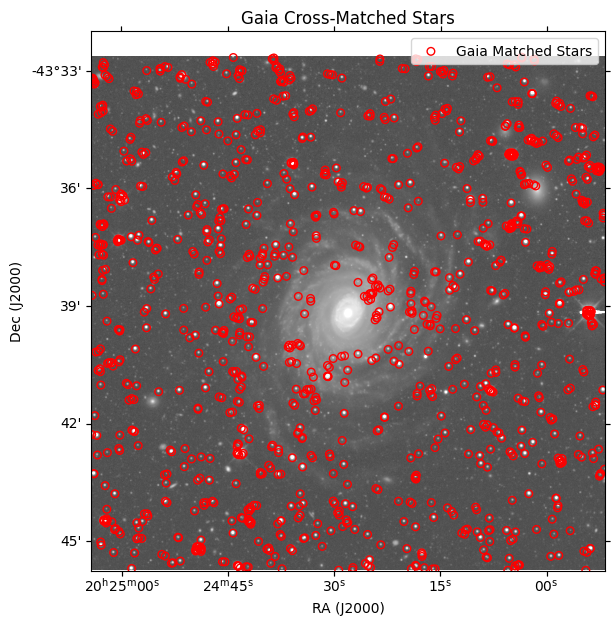

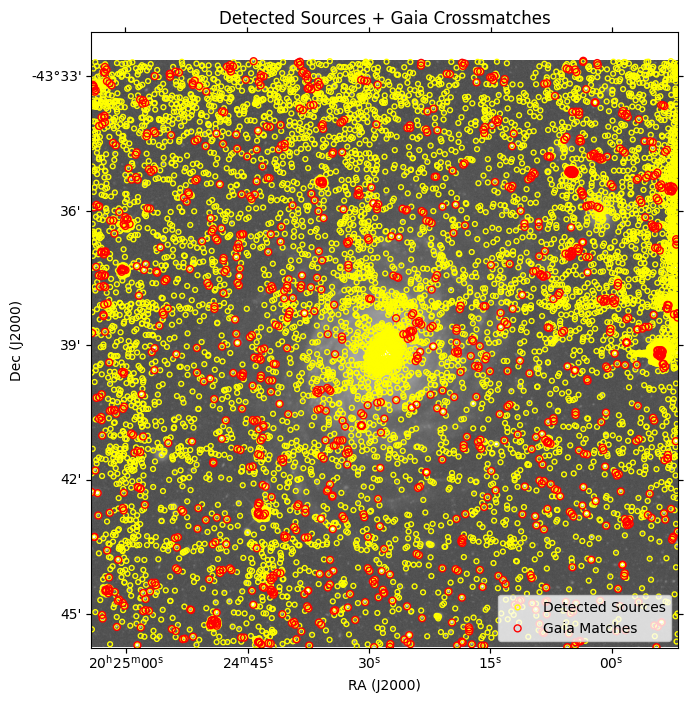

In [7]:
plot_sources(data, wcs, sources)
plt.show()
plot_matches(data, wcs, matched_fuv)
plt.show()
plot_all(data, wcs, sources, matched_fuv)
plt.show()

## Mask stars

In [8]:
mask = create_star_mask(data, wcs, matched_fuv,radius_arcsec=5)
masked = apply_mask(data, mask)

## Plot before/after masking

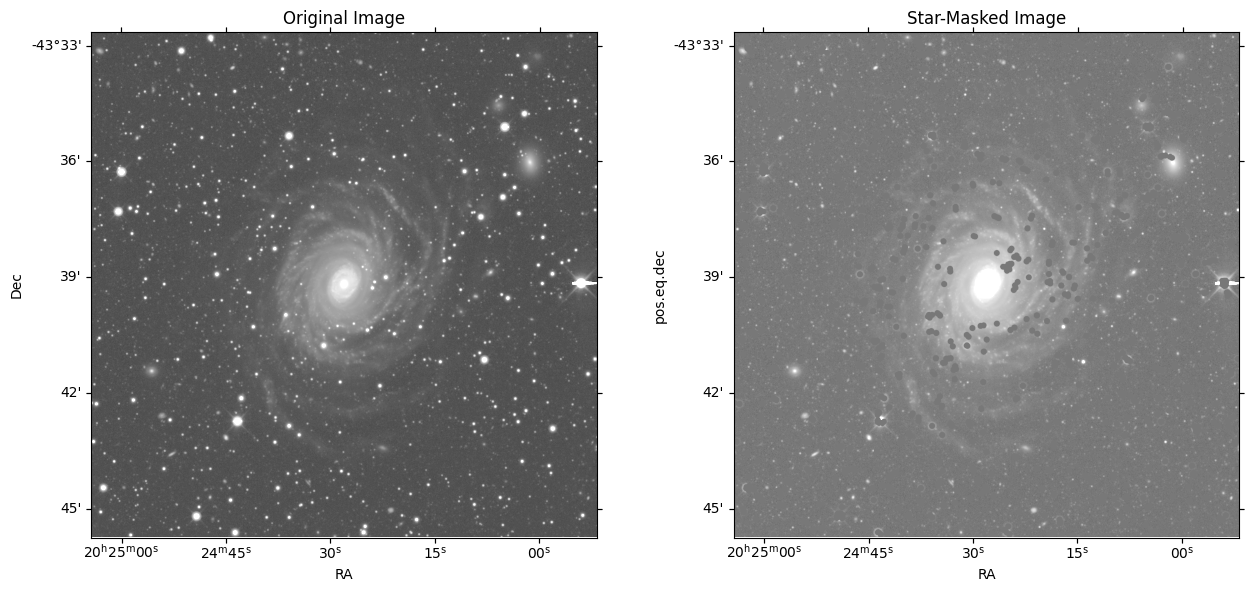

In [9]:
plot_before_after_mask(data, masked, wcs)
plt.show()

# Save the data

In [13]:

output_csv = save_skycoord_to_csv(matched_fuv, 'final_images/datasam.csv')
print("Saved:", output_csv)


Saved: final_images/datasam.csv
